# Duffing Oscillator Plots

Notebook dedicated to plotting the Duffing Oscillator and the results generated by the solve_ivp method.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import pickle

from sklearn.preprocessing import MinMaxScaler
from scipy.integrate import solve_ivp

import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# for reproducibility of this notebook:
rng = np.random.RandomState(42)
np.random.seed(42)




In [2]:
results_folder = "Array_Submission/"

In [3]:
# Configurations

Settings=["Base", "Random", "Energy","Gamma"]
Model_types=["True", "Complex", "Simple"]
Param_array = [{'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2},
                  {'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
                  {'alpha' : -1.0, 'beta' : -1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 0.1},
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2}]

i = 0
j = 0
k = 0

feature_setting = Settings[i]
model_setting = Model_types[j]
params = Param_array[k]




if feature_setting == "Base":
    from Array_Submission.BaseDuffing import Duffing
elif feature_setting == "Random":
    from Array_Submission.RandomDuffing import Duffing
elif feature_setting == "Energy":
    from Array_Submission.EnergyDuffing import Duffing
elif feature_setting == "Gamma":
    from Array_Submission.GammaDuffing import Duffing

save = True
save_suffix = "_setting_"+str(i)+"_param_"+str(k)

"\n[{'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, \n          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},\n          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, \n          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},\n          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.0, 'omega' : 1.2},\n          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},\n          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, \n          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},\n          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.0, 'delta' : 0.3, 'omega' : 0.0},\n          {'alpha' : -1.0, 'beta' : -1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},\n          {'alpha' : 0.0, 'beta' : 0.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}]\n          \n          "

In [7]:
# load dataset

duffing = Duffing(parameters = params)
eom = duffing.eom
features = duffing.features
labels = duffing.labels

In [8]:
big_df = pd.DataFrame()
models = {}
histories = {}
for j in Model_types:
    print(j)
    suffix = feature_setting + "_" + j + "_" + duffing.suffix
    print(suffix)
    temp_df = pd.read_csv(results_folder+"Results/explainer_dataframe_"+suffix+".csv")
    temp_df.insert(0, "Model", [j for i in range(temp_df.shape[0])])
    big_df = big_df.append(temp_df)
    if j == "True":
        models[j] = duffing
        histories[j] = None
    elif j != "True":
        models[j] = tf.keras.models.load_model(results_folder+"Models/Model"+suffix)
        histories[j] = pickle.load(open(results_folder+'Models/TrainingHistory/'+suffix, "rb"))
        

True
Base_True__-1.0_1.0_0.37_0.3_1.2
Complex
Base_Complex__-1.0_1.0_0.37_0.3_1.2
Simple
Base_Simple__-1.0_1.0_0.37_0.3_1.2


In [9]:
# generate some data to train the scaler

end_time = 100
duffing.generate(200, samples = 50, end_time = end_time)
duffing.scale_features()

X = pd.DataFrame(duffing.scaler.inverse_transform(big_df[features]), columns = features)
y = pd.DataFrame(duffing.predict(big_df[features]), columns = labels)

Generating Data…: 100%|██████████████████| 200/200 [00:05<00:00, 35.35it/s]


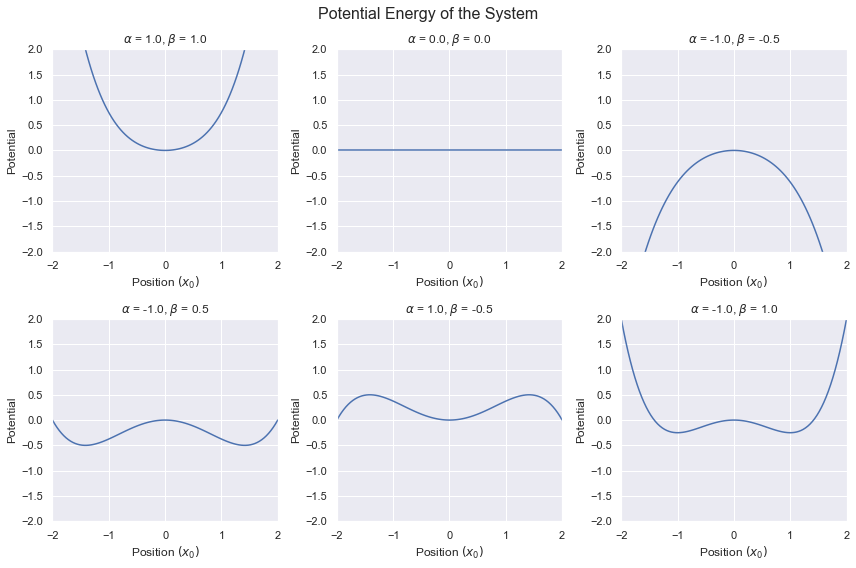

In [9]:
params_ = [{'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
                  {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
                  {'alpha' : -1.0, 'beta' : 0.5, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : 0.0, 'beta' : 0.0, 'gamma' : 0.37, 'delta' : 0.0, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  ]

f, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4,4,4]))

for i, param_ in enumerate(params_):
    x_potential = np.linspace(-2,2,100)
    v_potential = 0
    y_potential = (0.5*v_potential**2 + 0.5*param_['alpha']*x_potential**2 +0.25*param_['beta']*x_potential**4)
    
    sns.lineplot(x = x_potential, y=y_potential,ax=axs[i%2, i%3])
    
    axs[i%2, i%3].set_xlabel(r'Position $(x_0)$')
    axs[i%2, i%3].set_ylabel('Potential')
    axs[i%2, i%3].set_title(r"$\alpha$ = "+str(param_['alpha']) + r", $\beta$ = "+str(param_['beta']))
    axs[i%2, i%3].set(xlim=(-2, 2), ylim=(-2, 2))
    
f.suptitle("Potential Energy of the System", fontsize = 16)
f.tight_layout()

if save == True:
    f.savefig("Images/PotentialPlots.svg", dpi='figure')


In [38]:
params_

[{'alpha': -1.0, 'beta': 1.0, 'gamma': 0.37, 'delta': 0.3, 'omega': 1.2}]

Generating Data…: 100%|██████████████████████| 1/1 [00:00<00:00, 32.22it/s]


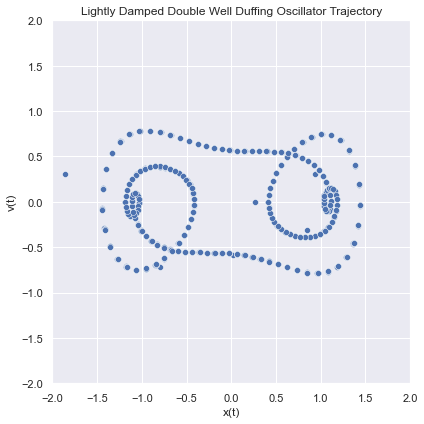

In [79]:
temp_duffing_plot = Duffing(parameters = params_[0])

temp_duffing_plot.generate(1, samples = 100, end_time = end_time)

f, axs = plt.subplots(1, 1, figsize=(6, 6), gridspec_kw=dict(width_ratios=[4]))

sns.scatterplot(data = temp_duffing_plot_vals, x = temp_duffing_plot_vals[:,0], y = temp_duffing_plot_vals[:,1], ax=axs)

axs.set_xlabel(r'x(t)')
axs.set_ylabel('v(t)')
axs.set_title(r"Lightly Damped Double Well Duffing Oscillator Trajectory")
axs.set(xlim=(-2, 2), ylim=(-2, 2))
    

f.tight_layout()

#if save == True:
#f.savefig("Images/DoubleWellTrajectory.svg", dpi='figure')

In [60]:
x0 = 0
v0 = 1
t = np.linspace(0,100,1000).reshape(-1,1)
in_array = np.hstack((x0*np.ones_like(t), v0*np.ones_like(t), t))

In [62]:
temp_duffing_plot_vals = temp_duffing_plot.predict(in_array)

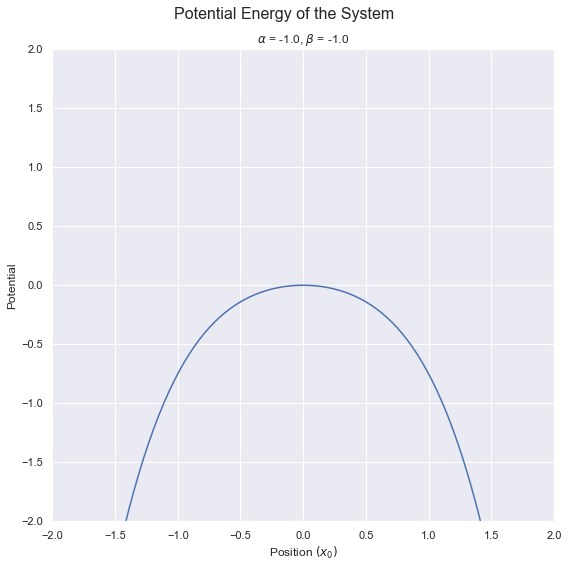

In [85]:
params_ = [{'alpha' : -1.0, 'beta' : -1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}]

f, axs = plt.subplots(1, 1, figsize=(8, 8), gridspec_kw=dict(width_ratios=[4]))

for i, param_ in enumerate(params_):
    x_potential = np.linspace(-2,2,100)
    v_potential = 0
    y_potential = (0.5*v_potential**2 + 0.5*param_['alpha']*x_potential**2 +0.25*param_['beta']*x_potential**4)
    
    sns.lineplot(x = x_potential, y=y_potential,ax=axs)
    
    axs.set_xlabel(r'Position $(x_0)$')
    axs.set_ylabel('Potential')
    axs.set_title(r"$\alpha$ = "+str(param_['alpha']) + r", $\beta$ = "+str(param_['beta']))
    axs.set(xlim=(-2, 2), ylim=(-2, 2))
    
f.suptitle("Potential Energy of the System", fontsize = 16)
f.tight_layout()

#if save == True:
#f.savefig("Images/PotentialPlotDouble.svg", dpi='figure')

Generating Data…: 100%|██████████████████| 100/100 [00:02<00:00, 34.45it/s]
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


Text(0.5, 1.0, 'Output Data for the Weakly Damped Double Well')

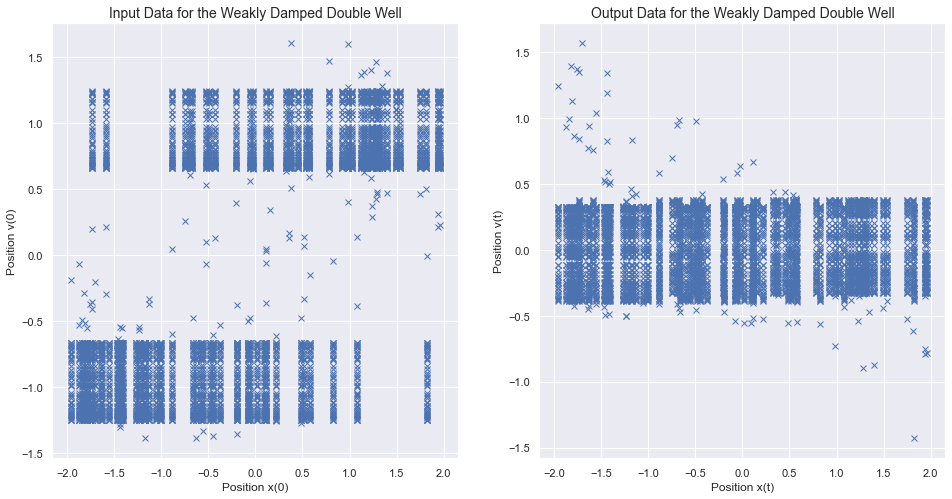

In [96]:
d = {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}
f, axs = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=[4,4]))


temp_duffing =  Duffing(parameters = d)
temp_duffing.generate(100, samples = 50, end_time = end_time)
sns.scatterplot(data = temp_duffing.X_df, x = "x0", y='v0',ax=axs[0], linewidth = 1, marker = 'x')
sns.scatterplot(data = temp_duffing.X_df, x = "xt", y='vt',ax=axs[1], linewidth = 1, marker = 'x')
axs[0].set_xlabel(r'Position x(0)', fontsize = 12)
axs[0].set_ylabel('Position v(0)', fontsize = 12)
axs[0].set_title(r"Input Data for the Weakly Damped Double Well", fontsize = 14)

axs[1].set_xlabel(r'Position x(t)', fontsize = 12)
axs[1].set_ylabel('Position v(t)', fontsize = 12)
axs[1].set_title(r"Output Data for the Weakly Damped Double Well", fontsize = 14)
#f.savefig("Images/UndampedDoubleWell.svg", dpi='figure')

Generating Data…: 100%|██████████████████| 100/100 [00:03<00:00, 32.89it/s]
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
Generating Data…: 100%|██████████████████| 100/100 [00:01<00:00, 90.74it/s]
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
Generating Data…: 100%|█████████████████| 100/100 [00:00<00:00, 442.48it/s]
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
Generating Data…: 100%|██████████████████| 100/100 [00:02<00:00, 36.26it/s]
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

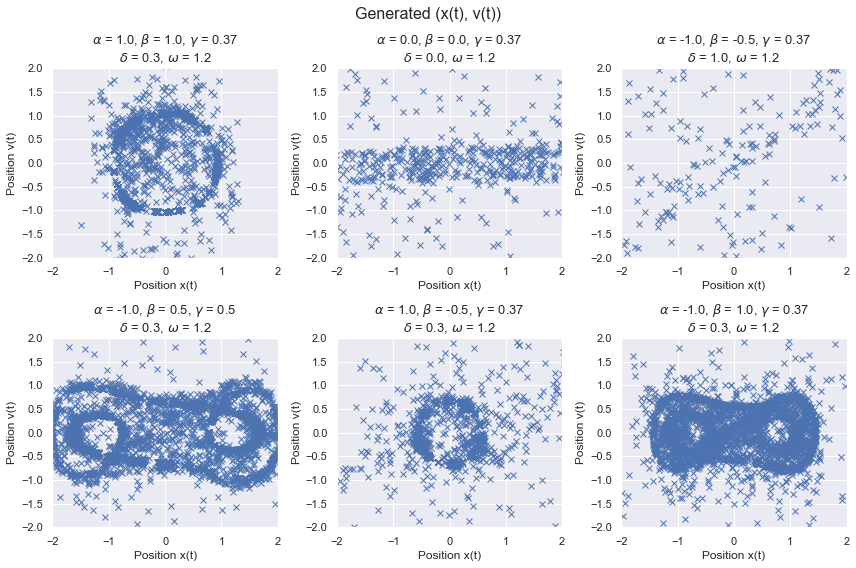

In [11]:
params_ = [{'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
                  {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
                  {'alpha' : -1.0, 'beta' : 0.5, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : 0.0, 'beta' : 0.0, 'gamma' : 0.37, 'delta' : 0.0, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  ]

f, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4,4,4]))

for i, param_ in enumerate(params_):
    temp_duffing =  Duffing(parameters = param_)
    temp_duffing.generate(100, samples = 50, end_time = end_time)
    sns.scatterplot(data = temp_duffing.X_df, x = "xt", y='vt',ax=axs[i%2, i%3], linewidth = 1, marker = 'x')
    axs[i%2, i%3].set_xlabel(r'Position x(t)', fontsize = 12)
    axs[i%2, i%3].set_ylabel('Position v(t)', fontsize = 12)
    axs[i%2, i%3].set_title(r"$\alpha$ = "+str(param_['alpha']) + r", $\beta$ = "+
                            str(param_['beta'])+ r", $\gamma$ = "+str(param_['gamma'])+ "\n"+ r"$\delta$ = "+
                            str(param_['delta'])+ r", $\omega$ = "+str(param_['omega']), fontsize = 13)
    axs[i%2, i%3].set(xlim=(-2, 2), ylim=(-2, 2))
    
f.suptitle("Generated (x(t), v(t))", fontsize = 16)
f.tight_layout()
if save == True:
    f.savefig("Images/OutputDataPlots.svg", dpi='figure')

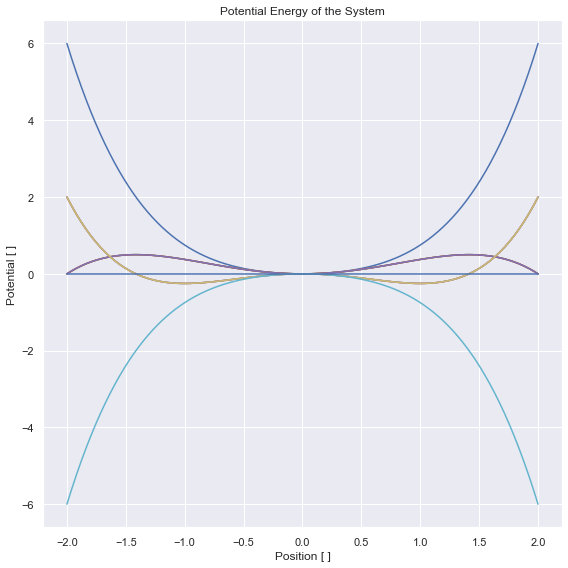

In [12]:
params_ = [{'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
                  {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
                  {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.0, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.0, 'delta' : 0.3, 'omega' : 0.0},
                  {'alpha' : -1.0, 'beta' : -1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
                  {'alpha' : 0.0, 'beta' : 0.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}]

f, axs = plt.subplots(1, 1, figsize=(8, 8), gridspec_kw=dict(width_ratios=[4]))
for i in params_:
    x_potential = np.linspace(-2,2,100)

    v_potential = 0
    y_potential = (0.5*v_potential**2 + 0.5*i['alpha']*x_potential**2 +0.25*i['beta']*x_potential**4)



    sns.lineplot(x = x_potential, y=y_potential,ax=axs)
    
axs.set_xlabel('Position [ ]')
axs.set_ylabel('Potential [ ]')
axs.set_title("Potential Energy of the System")


f.tight_layout()